In [14]:
from pipelines.pluribus import parse_hand
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH_ABS_PLURIBUS = "data/poker-hand-histories/data/pluribus/"
data_path_pluribus = Path(os.getcwd()) / Path("./../../") / DATA_PATH_ABS_PLURIBUS


In [3]:
hands_dict = {}
for i, folder in enumerate(os.listdir(data_path_pluribus)):
        hands_dict[folder] = {}
        for j, file_hand in enumerate(os.listdir(data_path_pluribus / folder)):
            hand = parse_hand(data_path_pluribus / folder / file_hand)
            file_number = int(file_hand.split(".")[0])
            hands_dict[folder][file_number] = hand


In [4]:
hands_dict['102'][0]

{'variant': 'NT',
 'ante_trimming_status': True,
 'antes': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'blinds_or_straddles': [50.0, 100.0, 0.0, 0.0, 0.0, 0.0],
 'min_bet': 100,
 'starting_stacks': [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0],
 'actions': ['d dh p1 2cAc',
  'd dh p2 9sTc',
  'd dh p3 4c6s',
  'd dh p4 Ks2d',
  'd dh p5 6dAd',
  'd dh p6 Jh5d',
  'p3 f',
  'p4 f',
  'p5 cbr 225',
  'p6 f',
  'p1 cc',
  'p2 cc',
  'd db Qs9c4s',
  'p1 cc',
  'p2 cc',
  'p5 cc',
  'd db As',
  'p1 cc',
  'p2 cc',
  'p5 cc',
  'd db 8d',
  'p1 cc',
  'p2 cc',
  'p5 cbr 337',
  'p1 cc',
  'p2 f',
  'p5 sm 6dAd',
  'p1 sm 2cAc'],
 'hand': 0,
 'players': ['MrBlue', 'MrBlonde', 'MrWhite', 'MrPink', 'MrBrown', 'Pluribus'],
 'finishing_stacks': [10112.5, 9775.0, 10000.0, 10000.0, 10112.5, 10000.0]}

In [16]:
hand_dict_copy = hands_dict.copy()

players_ref = hand_dict_copy['100'][0]['players']
money_ref = hand_dict_copy['100'][0]["starting_stacks"]
money = hand_dict_copy['100'][0]["starting_stacks"]

pluribus_money_end = []
money_by_player = {}

for i, folder in enumerate(hand_dict_copy.keys()):
    first_file = list(hand_dict_copy[folder].keys())[0]
    players_ref = hand_dict_copy[folder][first_file]['players']
    money_ref = hand_dict_copy[folder][first_file]["starting_stacks"]
    money = hand_dict_copy[folder][first_file]["starting_stacks"]

    print(f"\ni = {i}, folder = {folder}")
    print(f"money_ref = {money_ref}")
    print(f"money = {money}")
    print(f"finishing_stacks = {hand_dict_copy[folder][first_file]['finishing_stacks']}")

    for j, hand_number in enumerate(hand_dict_copy[folder].keys()):
        hand = hand_dict_copy[folder][hand_number]
        players_new_indices = [hand['players'].index(player) for player in players_ref]
        finishing_stacks = [hand["finishing_stacks"][i] for i in players_new_indices]

        money = [money[i] + finishing_stacks[i] - money_ref[i]  for i in range(len(money))]
        # print(f"\ni = {i}, j = {j}")
        # print(f"money_pot        = {money}")
        # print(f'finishing_stacks = {finishing_stacks}')
        # print(f"players = {hand['players']}")
        # print(f"players_new_indices = {players_new_indices}")
    
    print(f"player_ref = {players_ref}")
    print(f"money_ref  = {money_ref}")
    print(f"money_pot  = {money}")

    for player in players_ref:
        if player not in money_by_player.keys():
            money_by_player[player] = []
        player_index = players_ref.index(player)
        money_by_player[player].append(money[player_index])

    pluribus_money_end.append(money[players_ref.index("Pluribus")])
    



i = 0, folder = 100
money_ref = [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]
money = [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]
finishing_stacks = [10310.0, 9900.0, 10000.0, 9790.0, 10000.0, 10000.0]
player_ref = ['MrBlue', 'MrBlonde', 'MrWhite', 'MrPink', 'MrBrown', 'Pluribus']
money_ref  = [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]
money_pot  = [14517.0, 8385.0, 7499.0, 15151.0, 8848.0, 5600.0]

i = 1, folder = 100b
money_ref = [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]
money = [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]
finishing_stacks = [9950.0, 10050.0, 10000.0, 10000.0, 10000.0, 10000.0]
player_ref = ['Pluribus', 'MrBlue', 'MrBlonde', 'MrWhite', 'MrPink', 'MrOrange']
money_ref  = [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]
money_pot  = [5379.0, 13480.0, 8345.0, -4547.0, 10066.0, 27277.0]

i = 2, folder = 101
money_ref = [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]
money = [10000.0, 10000.0, 10000.0, 1

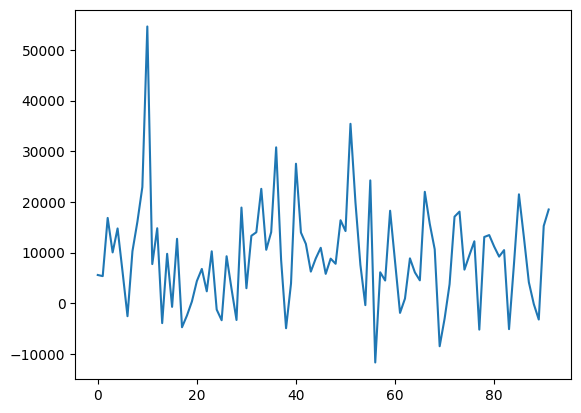

In [15]:
plt.plot(pluribus_money_end)

In [17]:
money_by_player.keys()

dict_keys(['MrBlue', 'MrBlonde', 'MrWhite', 'MrPink', 'MrBrown', 'Pluribus', 'MrOrange', 'Eddie', 'Joe', 'Bill', 'Gogo', 'Budd', 'Hattori', 'ORen'])

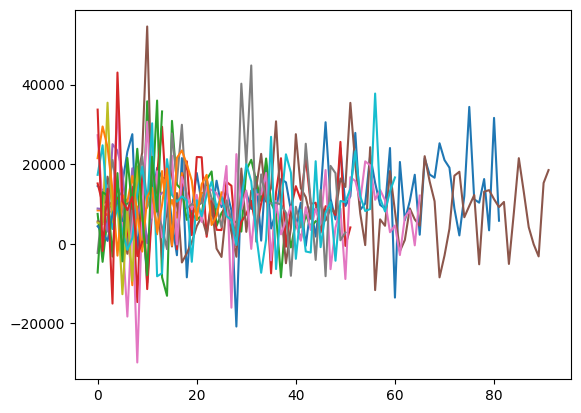

In [18]:
for player in money_by_player.keys():
    plt.plot(money_by_player[player])

In [22]:
for player in money_by_player.keys():
    print(f"player = {player}, len money = {len(money_by_player[player])}, money_tot = {np.sum(money_by_player[player]) / len(money_by_player[player])} money = {money_by_player[player]}")

player = MrBlue, len money = 82, money_tot = 11830.268292682927 money = [14517.0, 13480.0, 10181.0, 9250.0, 11237.5, 15337.0, 23103.0, 27530.0, -1951.0, 9862.0, -9827.0, 11024.0, 19066.0, 16551.0, 16455.0, 5305.0, -2887.0, 21521.0, -8442.0, 8603.0, 17779.0, 10237.0, 15408.0, 7057.0, 15835.0, 9212.0, 13367.0, 8414.0, -20807.0, 15182.0, 12836.0, 8750.0, 16803.0, 786.0, 19285.0, 3829.0, 8112.0, 16237.0, 15444.0, 8427.0, 4417.0, 10320.0, -513.0, 9296.0, 1817.0, 12465.0, 30535.0, 11348.0, 6125.0, 24031.0, 9500.0, 11938.0, 27854.0, 8535.0, 10115.0, 22201.0, 15300.0, 9774.0, 8860.0, 24057.0, -13532.0, 20554.0, 5904.0, 10739.0, 17336.0, 2267.0, 21493.0, 17398.0, 16589.0, 25253.5, 21028.0, 19112.0, 8824.0, 2093.0, 12025.0, 34386.0, 11160.0, 10328.0, 16255.0, 3372.0, 31626.0, 5788.0]
player = MrBlonde, len money = 23, money_tot = 8867.652173913044 money = [8385.0, 8345.0, 7020.0, 11050.0, 10615.0, 8525.0, 4340.0, -10420.0, 9348.0, 7415.0, 9130.0, 12800.0, 2380.0, 18260.0, 6820.0, 11011.0, 6533.0

In [28]:
TOKEN_WITH_FULL_HISTORY = 101816495
TOKEN_WITHOUT_HISTORY = 3385430
TOKEN_WITH_10_HISTORY = 16337356

In [29]:
print(f"TOKEN_WITH_FULL_HISTORY = {TOKEN_WITH_FULL_HISTORY/1_000_000}M")
print(f"TOKEN_WITHOUT_HISTORY = {TOKEN_WITHOUT_HISTORY/1_000_000}M")
print(f"TOKEN_WITH_10_HISTORY = {TOKEN_WITH_10_HISTORY/1_000_000}M")

TOKEN_WITH_FULL_HISTORY = 101.816495M
TOKEN_WITHOUT_HISTORY = 3.38543M
TOKEN_WITH_10_HISTORY = 16.337356M
